### Breast Cancer Prediction
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, these include:

* ID number

* Diagnosis (M = malignant, B = benign)

* Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)

* texture (standard deviation of gray-scale values) perimeter area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour) symmetry

* fractal dimension ("coastline approximation" - 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/breast-cancer.csv")

In [ ]:
df .head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns, df.shape

(Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'), (569, 32))

In [ ]:
# checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# to check for the types of diagnosis given to each patient and the count
df.groupby(["diagnosis"])["id"].count()

diagnosis
B    357
M    212
Name: id, dtype: int64

Text(0.5, 1.0, 'Distribution of Diagnosis Type')

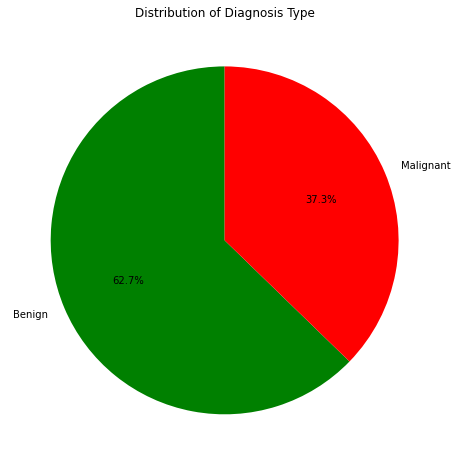

In [ ]:
plt.figure(figsize=(8,8))
y=np.array([357,212])
labels= (["Benign","Malignant"])
plt.pie(y,labels= labels, autopct="%1.1f%%", startangle=90, colors=["g","r"])
plt.title("Distribution of Diagnosis Type")

* This simply means that there were 62.7% of women with a diagnosis of benign breast cancer and 37.3% of women with a diagnosis of malignant type of breast cancer.

In [ ]:
# handling null values: the last column has all null values, so we drop it
# df.isnull().sum()
# df.drop(columns= ["Unnamed: 32"], axis=1, inplace=True)

## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

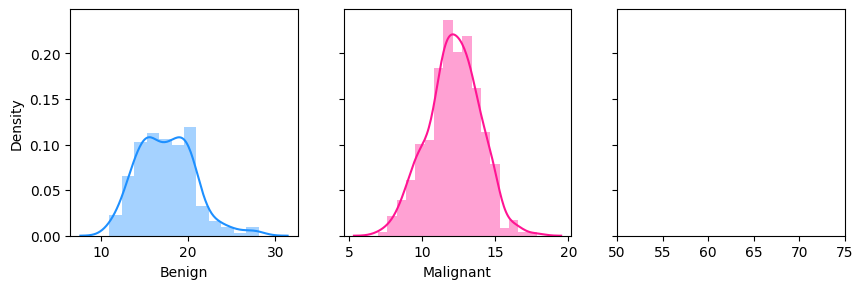

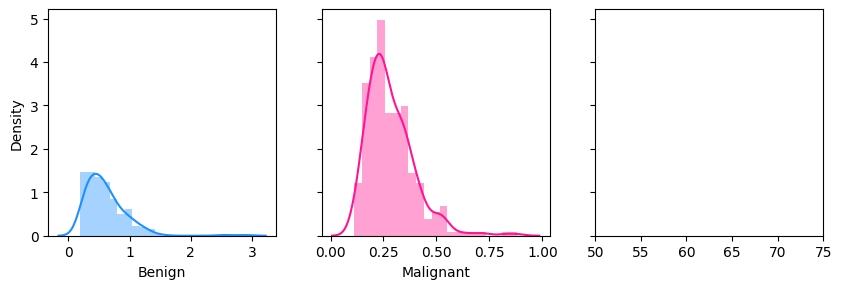

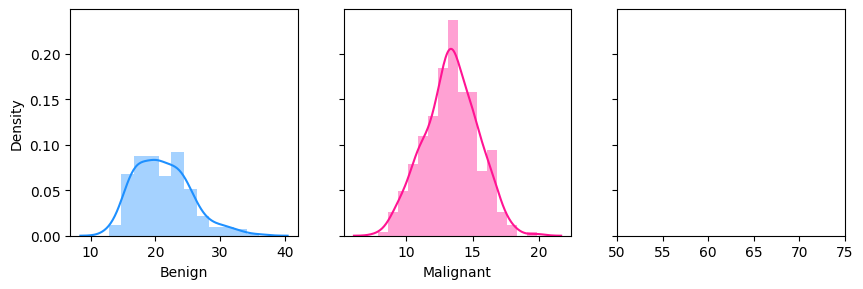

In [ ]:
# A distribution plot
x1 = df.loc[df.diagnosis=='M', ['radius_mean']]
x2 = df.loc[df.diagnosis=='B', ['radius_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['radius_se']]
x2 = df.loc[df.diagnosis=='B', ['radius_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['radius_worst']]
x2 = df.loc[df.diagnosis=='B', ['radius_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

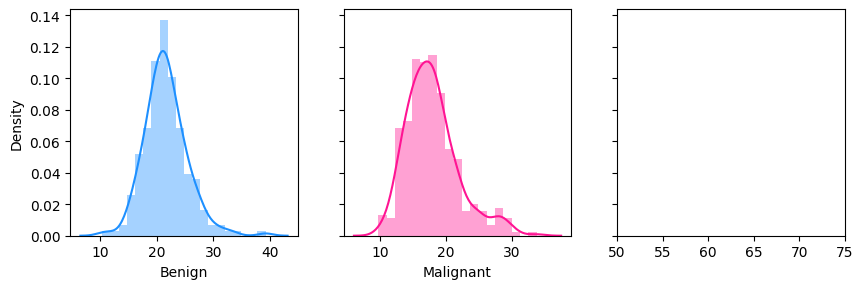

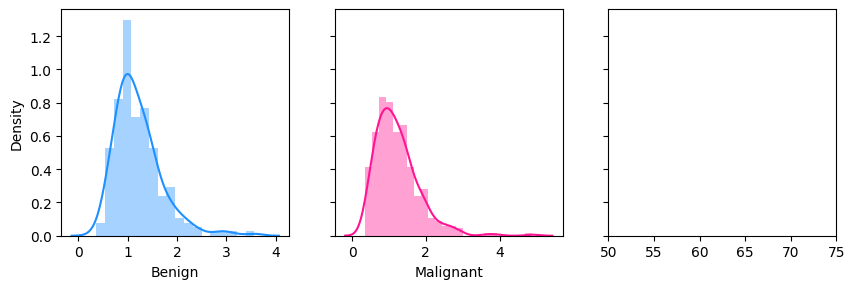

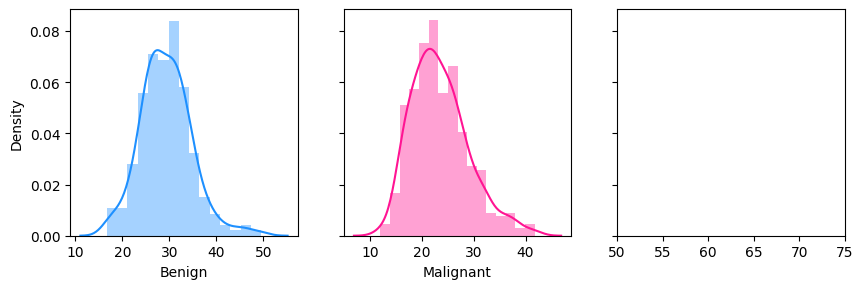

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['texture_mean']]
x2 = df.loc[df.diagnosis=='B', ['texture_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['texture_se']]
x2 = df.loc[df.diagnosis=='B', ['texture_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['texture_worst']]
x2 = df.loc[df.diagnosis=='B', ['texture_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

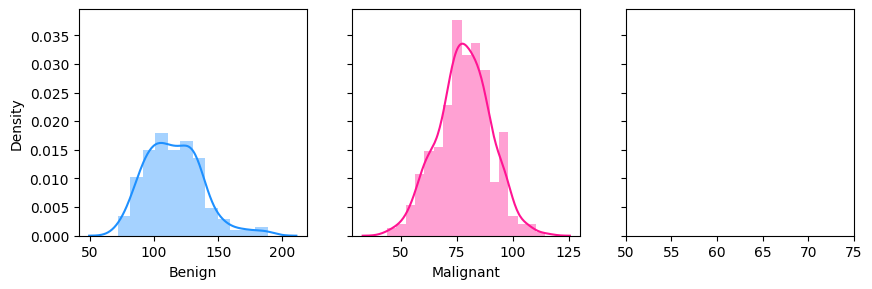

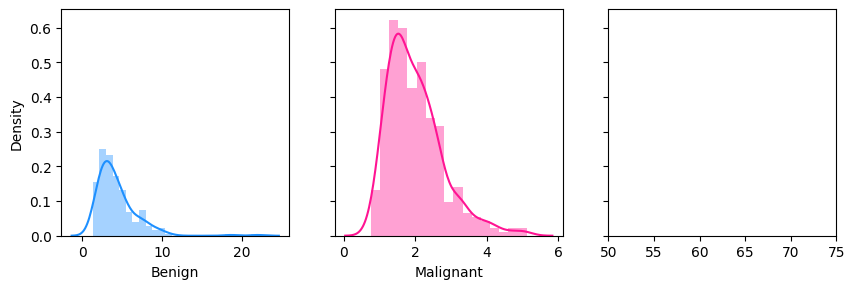

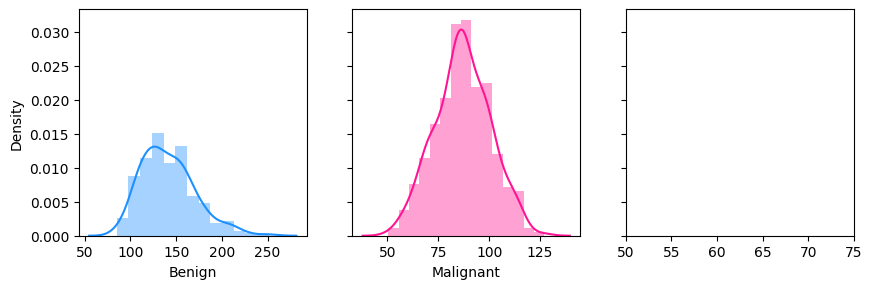

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['perimeter_mean']]
x2 = df.loc[df.diagnosis=='B', ['perimeter_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['perimeter_se']]
x2 = df.loc[df.diagnosis=='B', ['perimeter_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['perimeter_worst']]
x2 = df.loc[df.diagnosis=='B', ['perimeter_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

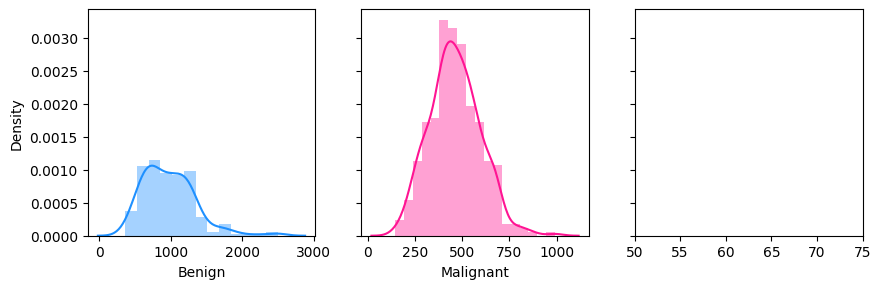

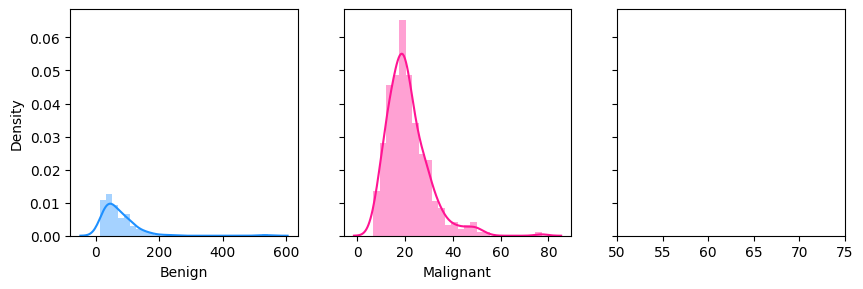

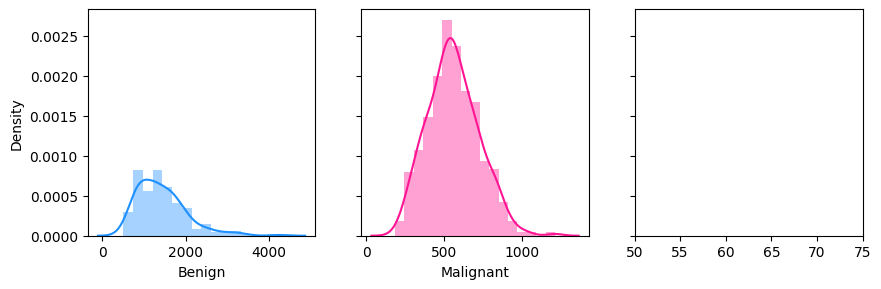

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['area_mean']]
x2 = df.loc[df.diagnosis=='B', ['area_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['area_se']]
x2 = df.loc[df.diagnosis=='B', ['area_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['area_worst']]
x2 = df.loc[df.diagnosis=='B', ['area_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

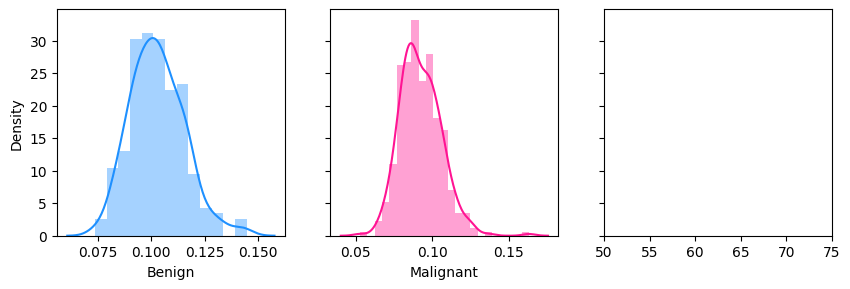

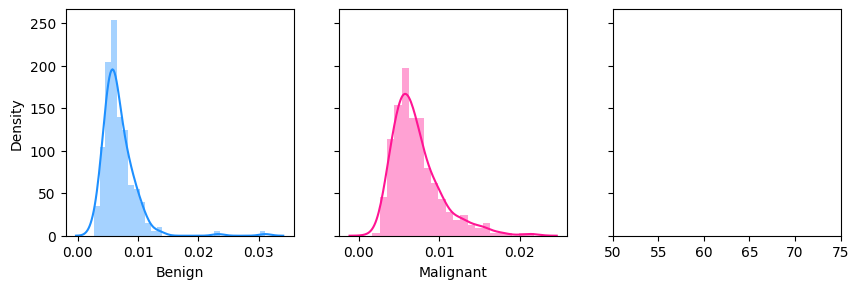

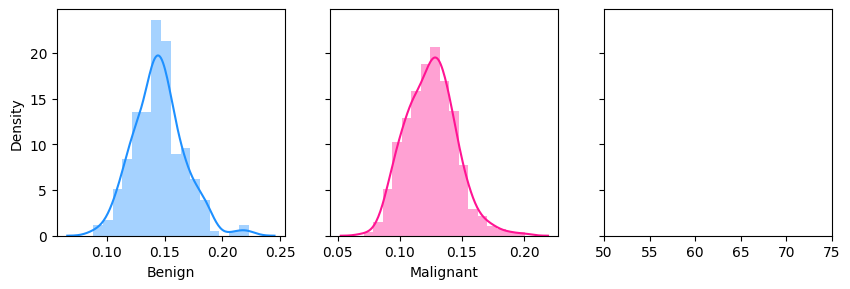

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['smoothness_mean']]
x2 = df.loc[df.diagnosis=='B', ['smoothness_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['smoothness_se']]
x2 = df.loc[df.diagnosis=='B', ['smoothness_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['smoothness_worst']]
x2 = df.loc[df.diagnosis=='B', ['smoothness_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

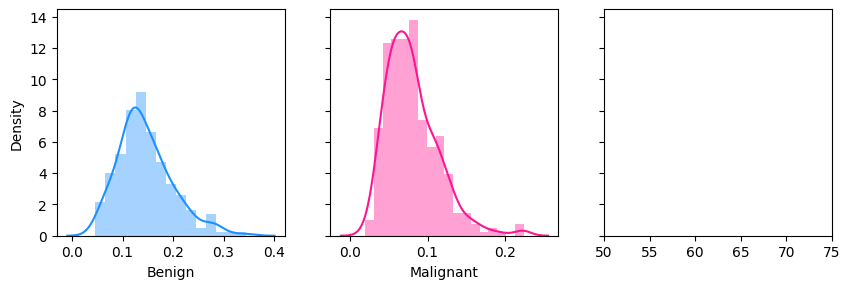

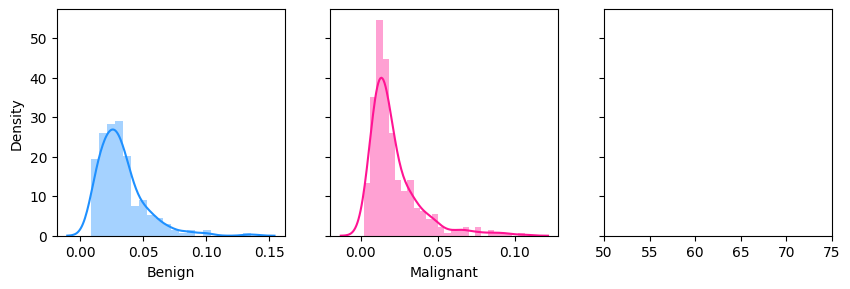

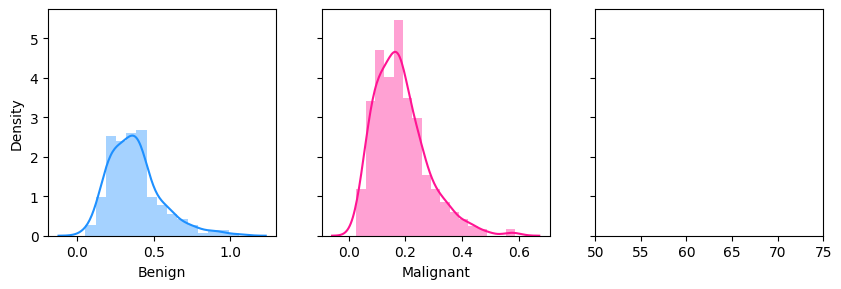

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['compactness_mean']]
x2 = df.loc[df.diagnosis=='B', ['compactness_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['compactness_se']]
x2 = df.loc[df.diagnosis=='B', ['compactness_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);


x1 = df.loc[df.diagnosis=='M', ['compactness_worst']]
x2 = df.loc[df.diagnosis=='B', ['compactness_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

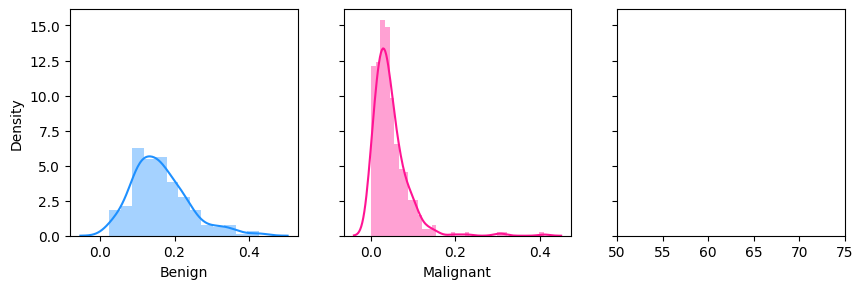

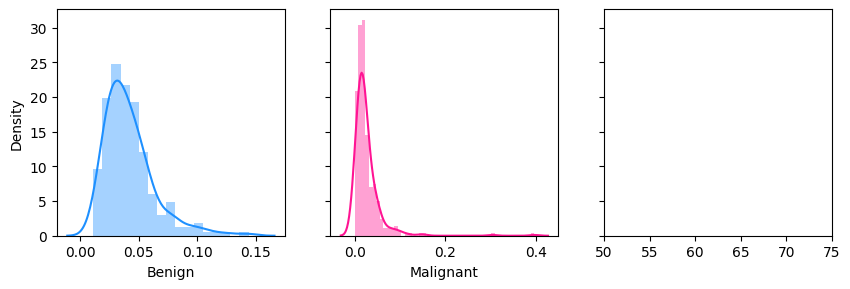

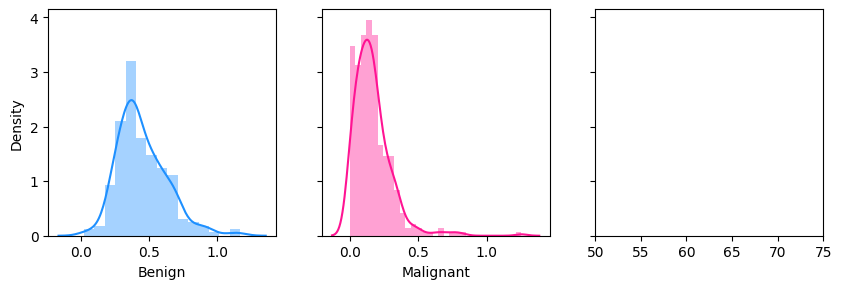

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['concavity_mean']]
x2 = df.loc[df.diagnosis=='B', ['concavity_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['concavity_se']]
x2 = df.loc[df.diagnosis=='B', ['concavity_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['concavity_worst']]
x2 = df.loc[df.diagnosis=='B', ['concavity_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

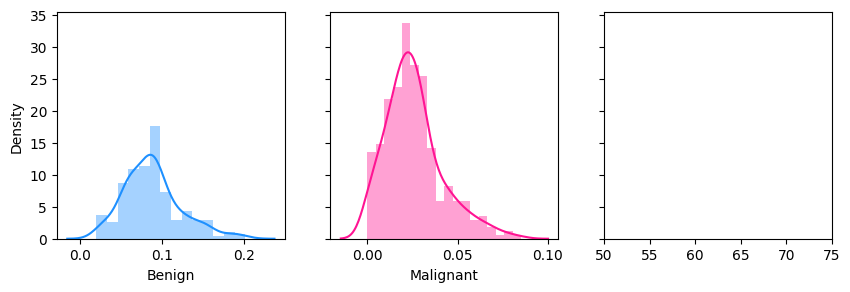

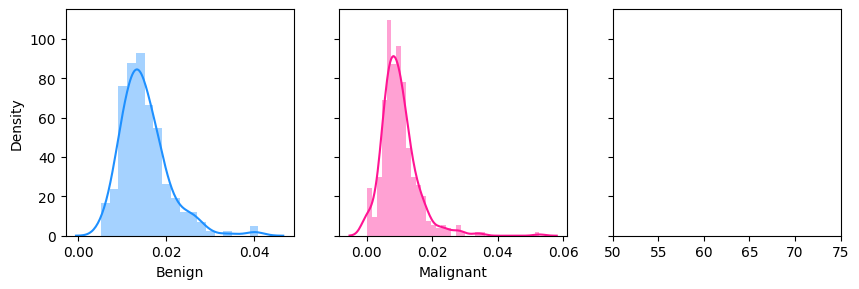

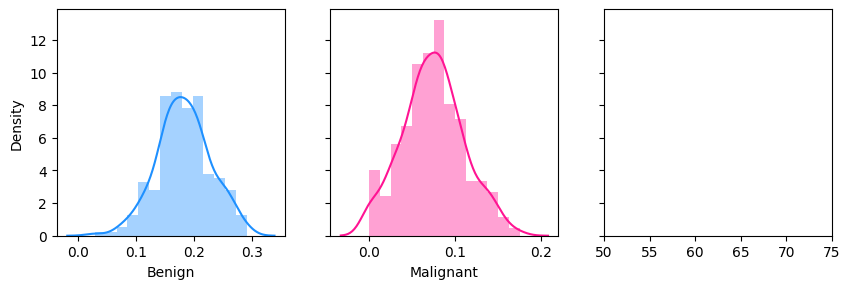

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['concave points_mean']]
x2 = df.loc[df.diagnosis=='B', ['concave points_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['concave points_se']]
x2 = df.loc[df.diagnosis=='B', ['concave points_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['concave points_worst']]
x2 = df.loc[df.diagnosis=='B', ['concave points_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

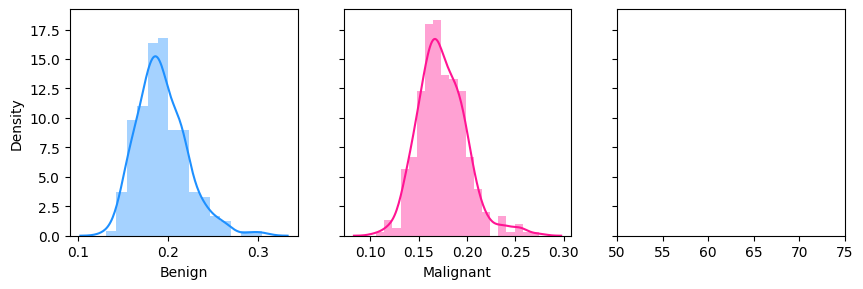

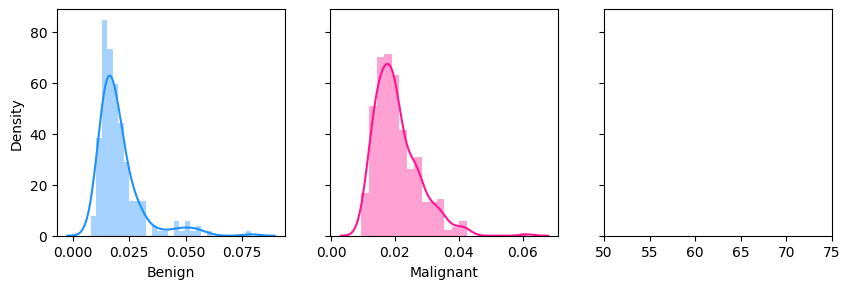

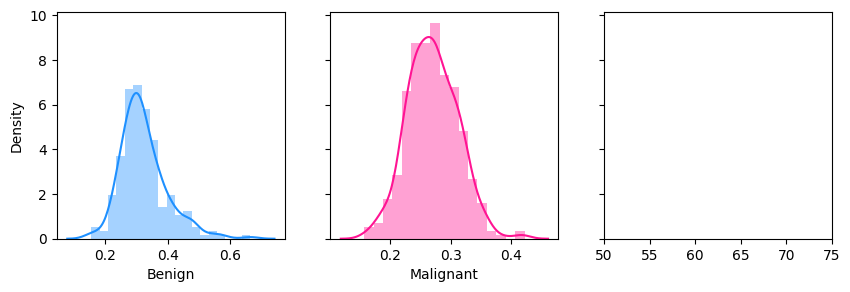

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['symmetry_mean']]
x2 = df.loc[df.diagnosis=='B', ['symmetry_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['symmetry_se']]
x2 = df.loc[df.diagnosis=='B', ['symmetry_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['symmetry_worst']]
x2 = df.loc[df.diagnosis=='B', ['symmetry_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

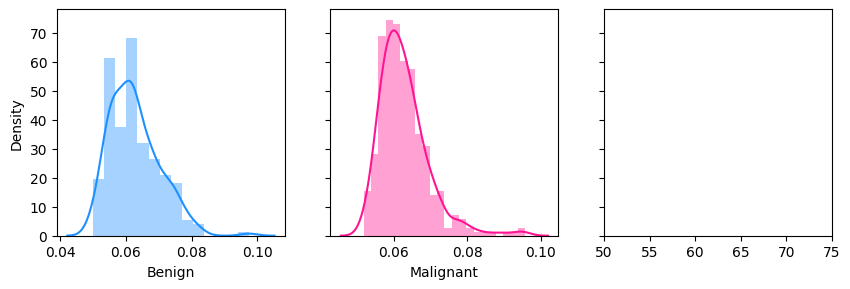

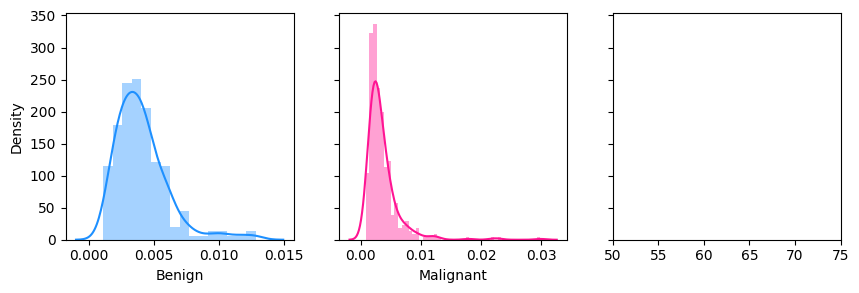

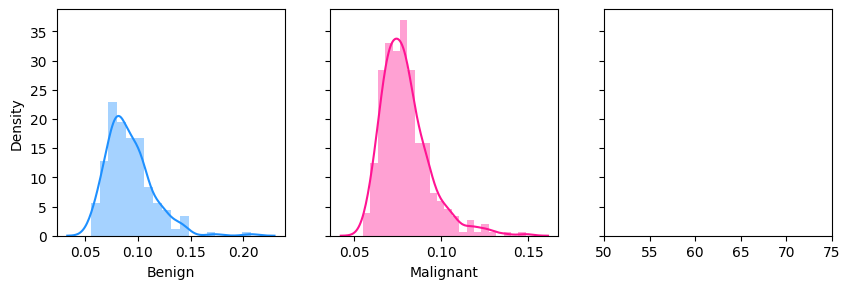

In [ ]:
x1 = df.loc[df.diagnosis=='M', ['fractal_dimension_mean']]
x2 = df.loc[df.diagnosis=='B', ['fractal_dimension_mean']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['fractal_dimension_se']]
x2 = df.loc[df.diagnosis=='B', ['fractal_dimension_se']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

x1 = df.loc[df.diagnosis=='M', ['fractal_dimension_worst']]
x2 = df.loc[df.diagnosis=='B', ['fractal_dimension_worst']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Benign')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Malignant')
plt.xlim(50,75);

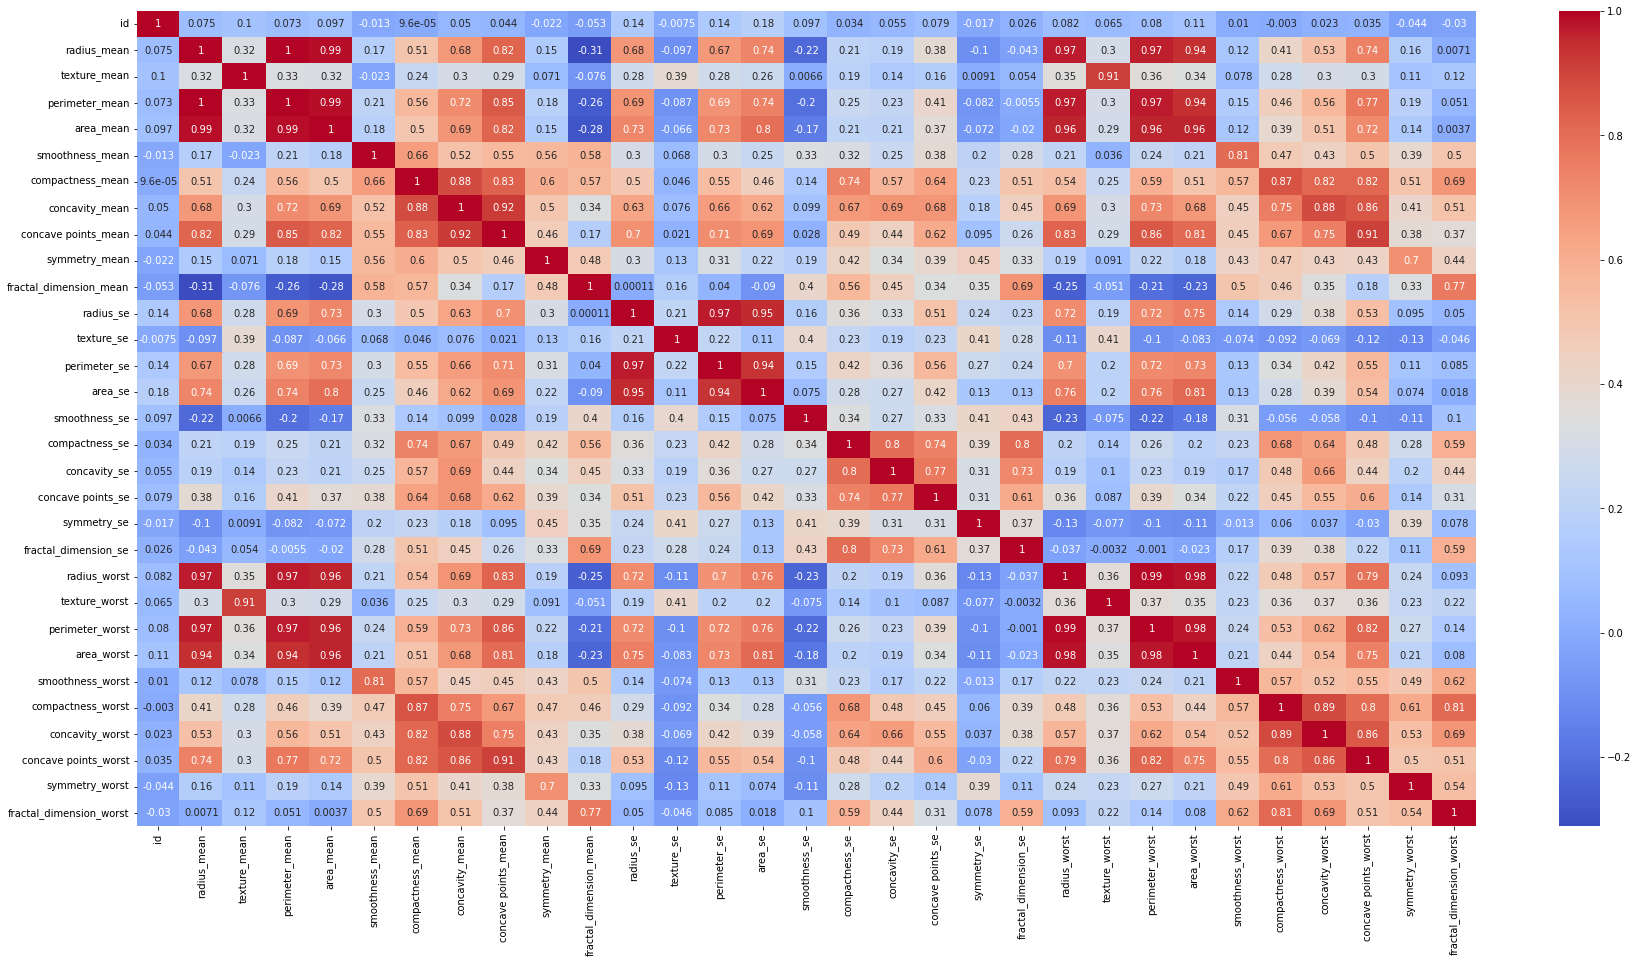

In [ ]:
# A correlation plot to show highly correlated features
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')

#### how features are correlated to one another
* radius worst vs radius mean
* perimeter worst vs radius mean
* area worst vs radius mean
* texture worst vs texture mean
* radius worst vs perimeter mean
* perimeter worst vs perimeter mean
* area worst vs perimeter mean
* radius worst vs area mean
* perimeter worst vs area mean
* perimeter worst vs area mean
* area worst vs area mean
* perimeter worst vs radius worst
* area worst vs radius worst
* area worst vs perimeter worst
* area se vs radius se
* area se vs peimeter se
* perimeter mean vs radius mean
* area mean vs radius mean
* area mean vs perimter mean

#### Positively Correlated Features
* In the scatter plot, the graph is to move from B to M, to show that the features are positively correlated.

Text(0.5, 1.0, 'perimeter worst vs radius mean')

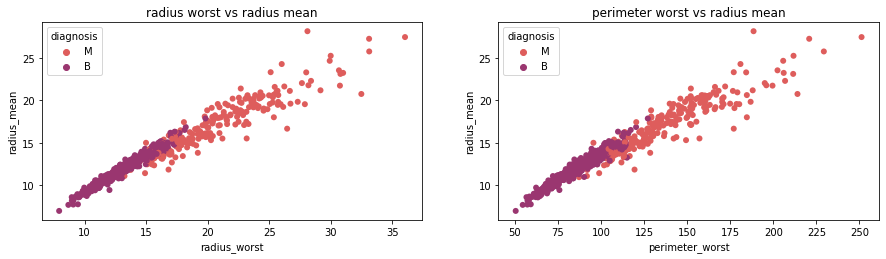

In [ ]:
# using a scatter plot to check the correlation betwen each of theses positively correlative features
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(x = df['radius_worst'], y = df['radius_mean'], hue = "diagnosis",
    data = df, palette = "flare", edgecolor="None")
plt.title('radius worst vs radius mean')

plt.subplot(222)
sns.scatterplot(x = df['perimeter_worst'], y = df['radius_mean'], hue = "diagnosis",
    data = df, palette = "flare", edgecolor="None")
plt.title('perimeter worst vs radius mean')

Text(0.5, 1.0, 'texture worst vs texture mean')

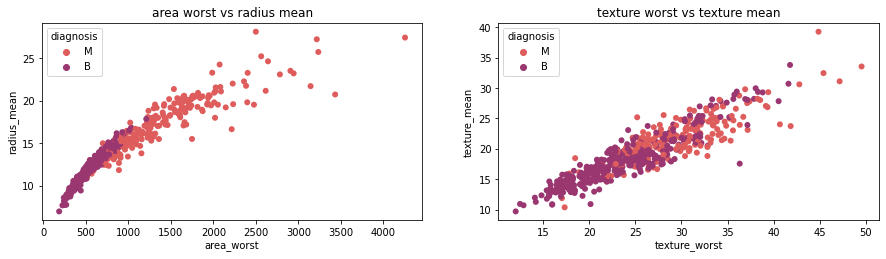

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["area_worst"], y=df["radius_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs radius mean")

plt.subplot(222)
sns.scatterplot(x=df["texture_worst"], y=df["texture_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("texture worst vs texture mean")

Text(0.5, 1.0, 'perimeter worst vs perimeter mean')

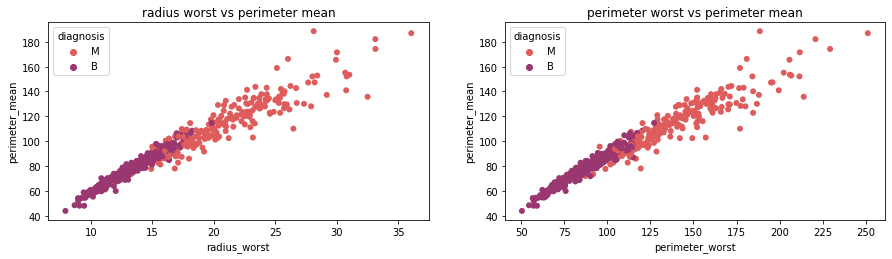

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)

sns.scatterplot(x=df["radius_worst"], y=df["perimeter_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("radius worst vs perimeter mean")

plt.subplot(222)
sns.scatterplot(x=df["perimeter_worst"], y=df["perimeter_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("perimeter worst vs perimeter mean")

Text(0.5, 1.0, 'radius worst vs area mean')

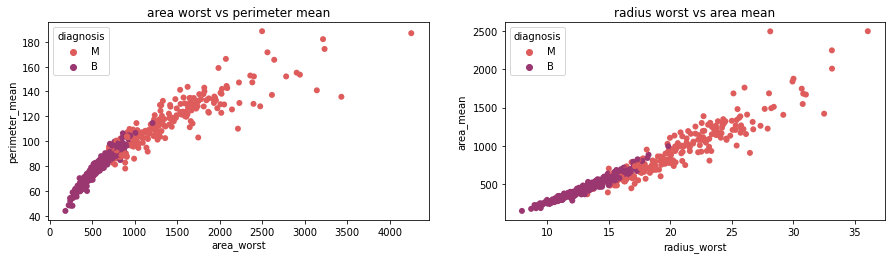

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["area_worst"], y=df["perimeter_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs perimeter mean")

plt.subplot(222)
sns.scatterplot(x=df["radius_worst"], y=df["area_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("radius worst vs area mean")

Text(0.5, 1.0, 'area worst vs area mean')

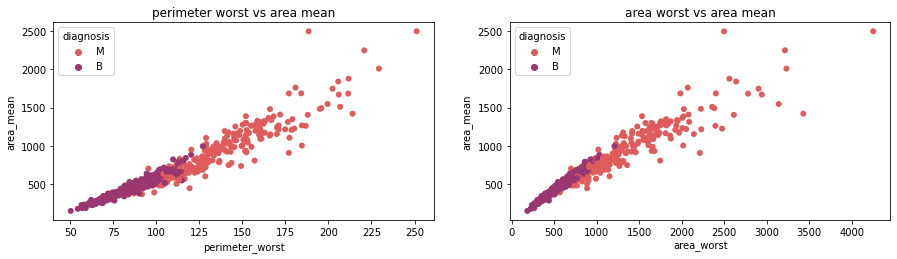

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["perimeter_worst"], y=df["area_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("perimeter worst vs area mean")

plt.subplot(222)
sns.scatterplot(x=df["area_worst"], y=df["area_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs area mean")

Text(0.5, 1.0, 'area worst vs radius worst')

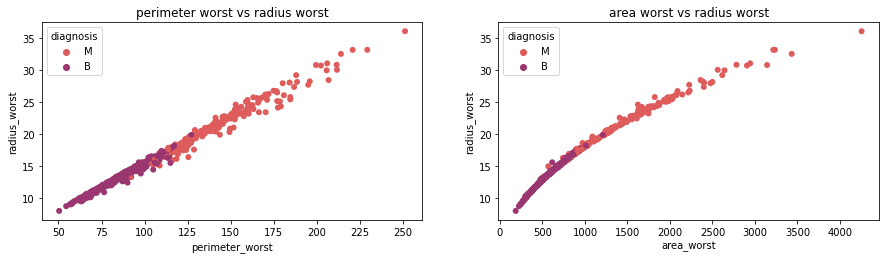

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["perimeter_worst"], y=df["radius_worst"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("perimeter worst vs radius worst")

plt.subplot(222)
sns.scatterplot(x=df["area_worst"], y=df["radius_worst"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs radius worst")

Text(0.5, 1.0, 'area se vs radius se')

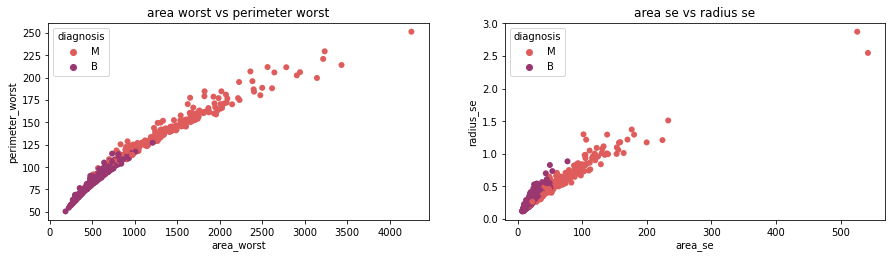

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["area_worst"], y=df["perimeter_worst"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs perimeter worst")

plt.subplot(222)
sns.scatterplot(x=df["area_se"], y=df["radius_se"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area se vs radius se")

Text(0.5, 1.0, 'perimeter mean vs radius mean')

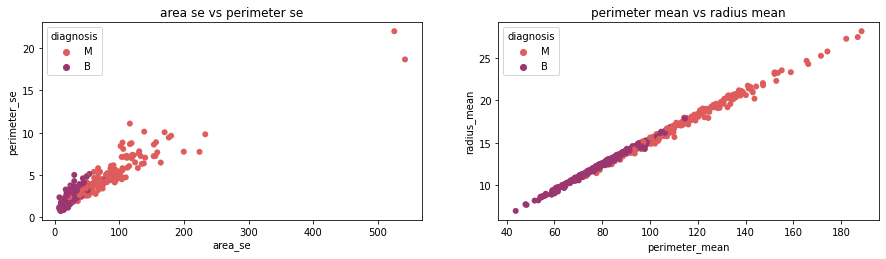

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["area_se"], y=df["perimeter_se"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area se vs perimeter se")

plt.subplot(222)
sns.scatterplot(x=df["perimeter_mean"], y=df["radius_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("perimeter mean vs radius mean")

Text(0.5, 1.0, 'area mean vs perimeter mean')

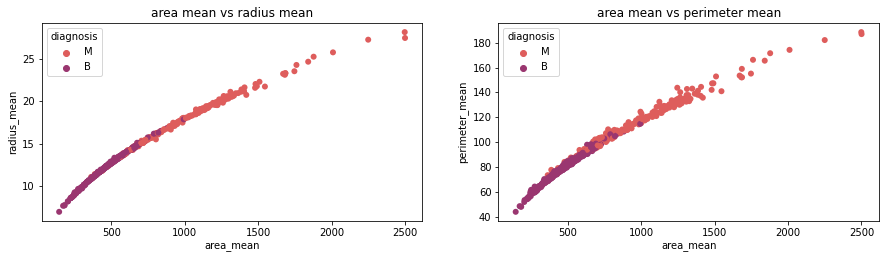

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["area_mean"], y=df["radius_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area mean vs radius mean")

plt.subplot(222)
sns.scatterplot(x=df["area_mean"], y=df["perimeter_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area mean vs perimeter mean")

#### Negatively Correlated Features
* In the scatter plot, when it moves from M to B it shows that the features are negatively correlated.

Text(0.5, 1.0, 'texture worst vs symmetry se')

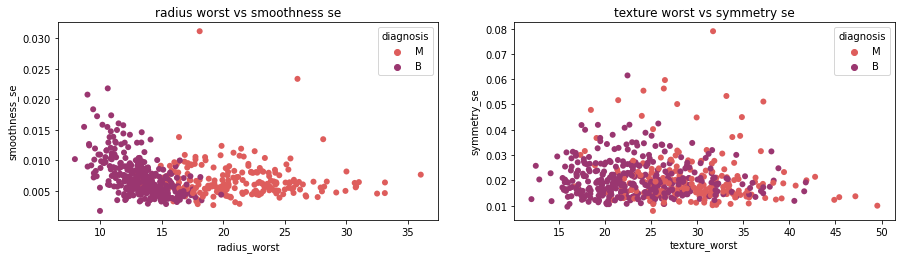

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["radius_worst"], y=df["smoothness_se"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("radius worst vs smoothness se")

plt.subplot(222)
sns.scatterplot(x=df["texture_worst"], y=df["symmetry_se"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("texture worst vs symmetry se")

#### Uncorrelated Features
* In the plot the dots for both Malignant and Benign are random and overlapped on one another, which depicts that the features are not correlated

Text(0.5, 1.0, 'area worst vs radius mean')

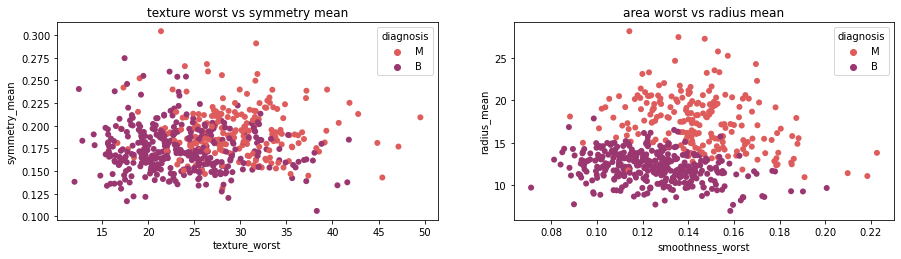

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(x=df["texture_worst"], y=df["symmetry_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("texture worst vs symmetry mean")

plt.subplot(222)
sns.scatterplot(x=df["smoothness_worst"], y=df["radius_mean"],hue="diagnosis", data=df, palette="flare", edgecolor="None")
plt.title("area worst vs radius mean")

Text(0.5, 1.0, 'id vs radius mean')

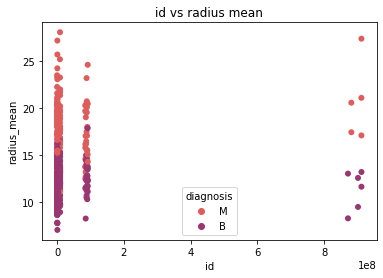

In [ ]:
sns.scatterplot(x = df['id'], y = df['radius_mean'], hue = "diagnosis",
    data = df, palette = "flare", edgecolor="None")
plt.title('id vs radius mean')

In [ ]:
# from matplotlib import model_feature_importances
# # feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# # feat_importances.nlargest(20).plot(kind='barh')

# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.show()

#### Preparing the dataset for training and modelling

In [ ]:
# Re-arranging the columns for easy slicing
# selecting the highly correlated features as input for training
data = df.reindex(columns=['diagnosis','id', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se',
       'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst','compactness_worst', 'concavity_worst', 
       'concave points_worst','symmetry_worst', 'fractal_dimension_worst','perimeter_se', 
       'area_se','perimeter_worst', 'area_worst','radius_mean','texture_mean','perimeter_mean',
       'area_mean','radius_worst', 'texture_worst','radius_se'])

In [ ]:
data.columns

Index(['diagnosis', 'id', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'perimeter_se', 'area_se', 'perimeter_worst',
       'area_worst', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'radius_worst', 'texture_worst', 'radius_se'],
      dtype='object')

In [ ]:
input_cols, target_cols=data.columns[1:], data.columns[:1]
input_dfs, target_dfs= data.columns[1:].copy(), data.columns[:1].copy()

In [ ]:
# for encoding all the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_target = df[target_cols].apply(le.fit_transform)

In [ ]:
#casting all the np.number to a new list
numeric_cols = data[input_cols].select_dtypes(include=np.number).columns.tolist()

In [ ]:
# to normalize the input columns for training
imputer = SimpleImputer().fit(data[numeric_cols])
data[numeric_cols] = imputer.transform(data[numeric_cols])
scaler = MinMaxScaler().fit(data[numeric_cols])
normalized_input = scaler.transform(data[numeric_cols])

In [ ]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(normalized_input,encoded_target,test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
# training using logistic regression
lr= LogisticRegression()

In [ ]:
model = lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_accuracy=lr.score(X_test,Y_test)
lr_accuracy

0.9824561403508771

In [ ]:
importance = model.coef_[0]

In [ ]:
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.15390
Feature: 1, Score: 0.62645
Feature: 2, Score: 0.36306
Feature: 3, Score: 1.32157
Feature: 4, Score: 2.04963
Feature: 5, Score: 0.46695
Feature: 6, Score: -0.80235
Feature: 7, Score: 0.03431
Feature: 8, Score: 0.00654
Feature: 9, Score: -0.66524
Feature: 10, Score: -0.30309
Feature: 11, Score: 0.19220
Feature: 12, Score: -0.26412
Feature: 13, Score: -0.65771
Feature: 14, Score: 1.42255
Feature: 15, Score: 0.79755
Feature: 16, Score: 1.33409
Feature: 17, Score: 2.49247
Feature: 18, Score: 1.39002
Feature: 19, Score: 0.29210
Feature: 20, Score: 0.85816
Feature: 21, Score: 0.75052
Feature: 22, Score: 1.97947
Feature: 23, Score: 1.57214
Feature: 24, Score: 1.74901
Feature: 25, Score: 1.67942
Feature: 26, Score: 1.71416
Feature: 27, Score: 1.47846
Feature: 28, Score: 2.18964
Feature: 29, Score: 2.28914
Feature: 30, Score: 1.13375


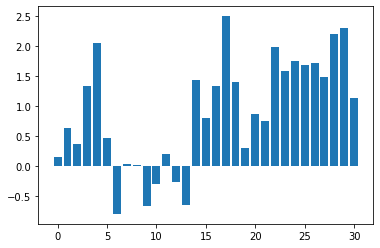

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
Y_pred=lr.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from sklearn import metrics
lr_cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
lr_cnf_matrix

array([[71,  0],
       [ 2, 41]])

Text(0.5, 257.44, 'Predicted label')

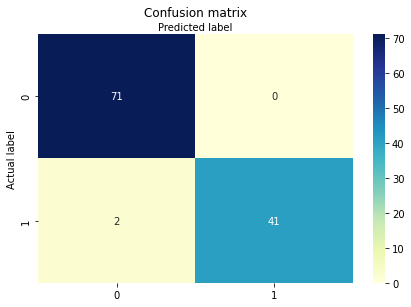

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(lr_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
log_accuracy= metrics.accuracy_score(Y_test, y_pred)
log_precision = metrics.precision_score(Y_test, y_pred)
log_recall = metrics.recall_score(Y_test, y_pred)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233


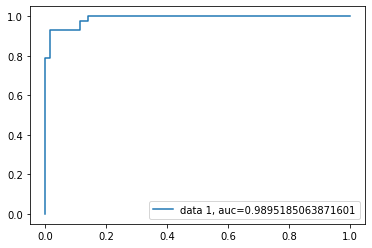

In [ ]:
# using the ROC Curve to check for the true positive rate against the false negative rate
y_pred_proba = log.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
svc_model=classifier.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn import svm
trainedsvm = svm.SVC().fit(X_train, Y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(Y_test,predictionsvm))
print(classification_report(Y_test,predictionsvm))


[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.9736842105263158


#### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model=knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(knn.predict(X_test))

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [ ]:
knn.score(X_test,Y_test)

0.9649122807017544

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [ ]:
clf= DecisionTreeClassifier()

In [ ]:
clf=clf.fit(X_train,Y_train)

In [ ]:
clf.score(X_test,Y_test)

0.9473684210526315

* So far logistic regression gives us the best, model prediction, with an accuracy of 0.98, so we train subsequent datasets entered using logistic regression model 

### Saving and Load Model

In [ ]:
import pickle

In [ ]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

In [ ]:
# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

In [ ]:
# Use the loaded pickled model to make predictions
# lr_from_pickle.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])